# Forecasting Growth

By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

In [6]:
import pandas as pd
from prophet import Prophet

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
print(df.head(5))
print(df.tail(5))

           ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572
              ds          y
2900  2016-01-16   7.817223
2901  2016-01-17   9.273878
2902  2016-01-18  10.333775
2903  2016-01-19   9.125871
2904  2016-01-20   8.891374


In [8]:
# Specify carrying capacity(depends on expert and market size) on the clolumn 'cap'

df['cap'] = 8.5

# NOTE:
# The important things to note are that cap must be specified for every row in the dataframe, 
# and that it does not have to be constant. 
# If the market size is growing, then cap can be an increasing sequence.

In [9]:
m = Prophet(growth = 'logistic')
m.fit(df)

21:03:27 - cmdstanpy - INFO - Chain [1] start processing
21:03:27 - cmdstanpy - INFO - Chain [1] done processing


/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


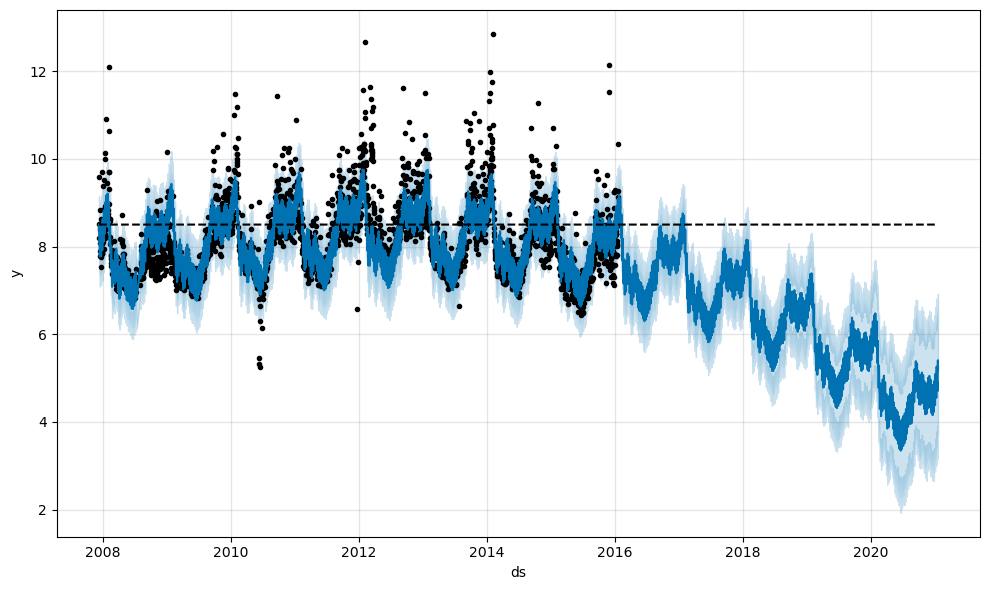

In [13]:
# make future predictions lets consider 5 years
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcts = m.predict(future)
fig1 = m.plot(fcts)

In [14]:
# NOTE
# The logistic function has an implicit minimum of 0, 
# and will saturate at 0 the same way that it saturates at the capacity. 
# It is possible to also specify a different saturating minimum.


# Saturating Minimum

21:12:52 - cmdstanpy - INFO - Chain [1] start processing
21:12:53 - cmdstanpy - INFO - Chain [1] done processing
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


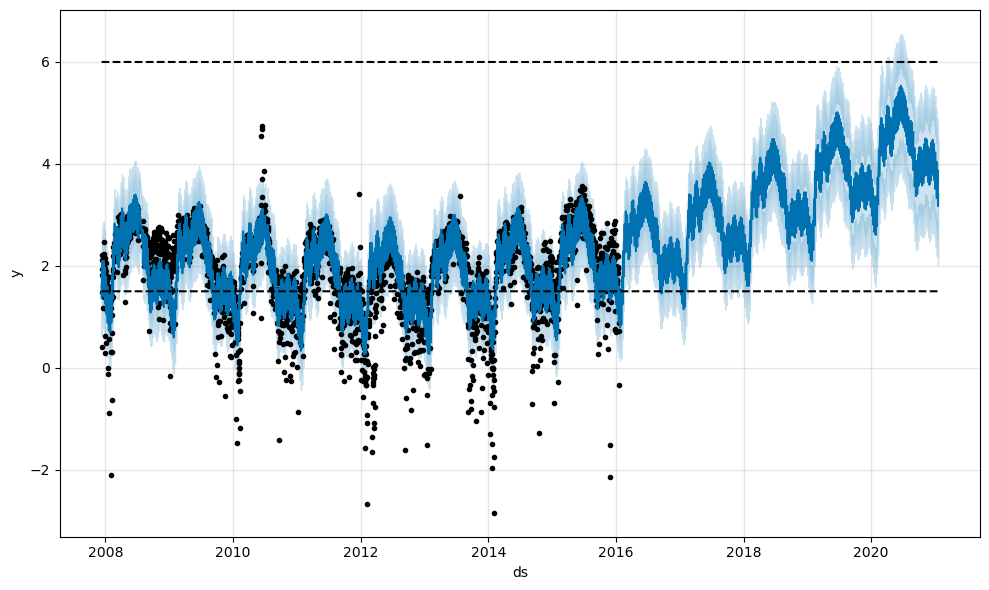

In [15]:
# The logistic growth model can also handle a saturating minimum, 
# which is specified with a column floor in the same way as the cap column specifies the maximum:

df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth = 'logistic')
m.fit(df)
fcst = m.predict(future)
fig2 = m.plot(fcst)

# Automatic ChangePoint Detetction in Prophet

You may have noticed in the earlier examples in this documentation that real time series 
frequently have abrupt changes in their trajectories. By default, 
Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.
However, if you wish to have finer control over this process 
(e.g., Prophet missed a rate change, or is overfitting rate changes in the history), 
then there are several input arguments you can use.

Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change.

By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series.

The number of potential changepoints can be set using the argument n_changepoints, but this is better tuned by adjusting the regularization. The locations of the signification changepoints can be visualized with:

In [17]:
from prophet.plot import add_changepoints_to_plot

/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


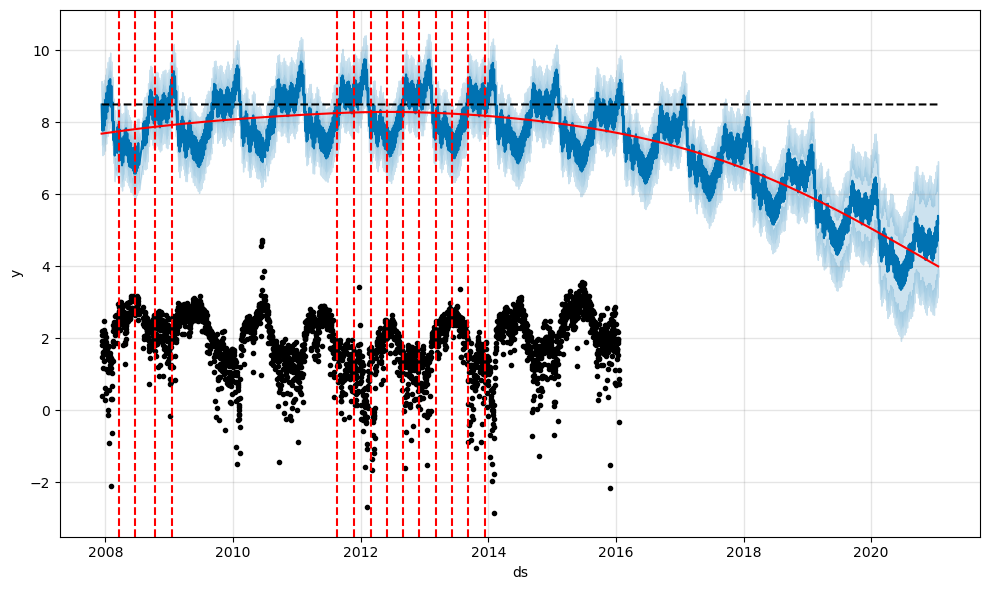

In [26]:
fig = m.plot(fcts)
a = add_changepoints_to_plot(fig.gca(), m, fcts)

In [27]:
# NOTE
# This default works in many situations but not all, 
# and can be changed using the changepoint_range argument. For example, m = Prophet(changepoint_range=0.9)

# Adjusting the Trend Flexibility

If the trend changes are being overfit (too much flexibility) or 
underfit (not enough flexibility), you can adjust the strength of the sparse prior using 
the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. 
Increasing it will make the trend more flexible:

21:51:26 - cmdstanpy - INFO - Chain [1] start processing
21:51:27 - cmdstanpy - INFO - Chain [1] done processing
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


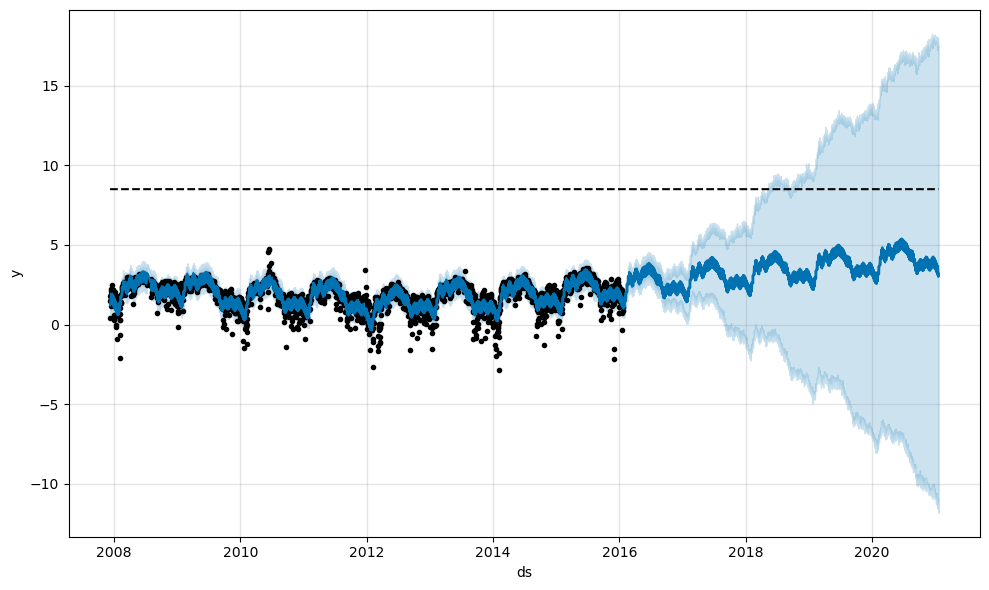

In [31]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)


21:52:46 - cmdstanpy - INFO - Chain [1] start processing
21:52:46 - cmdstanpy - INFO - Chain [1] done processing
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


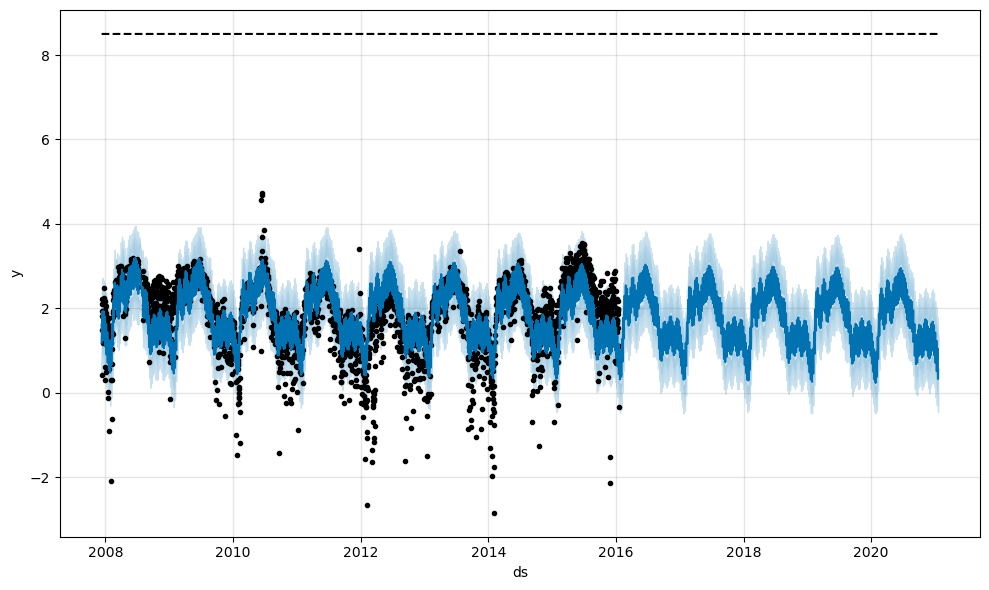

In [32]:
#  Decreasing it makes less flexible
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

# Specifying the Location of ChanghePoints

If you wish, rather than using automatic changepoint detection you can manually specify the locations 
of potential changepoints with the changepoints argument. Slope changes will then be allowed only at these points,
with the same sparse regularization as before. One could, for instance, 
create a grid of points as is done automatically, 
but then augment that grid with some specific dates that are known to be likely to have changes. 
As another example, the changepoints could be entirely limited to a small set of dates, as is done here:

21:55:17 - cmdstanpy - INFO - Chain [1] start processing
21:55:17 - cmdstanpy - INFO - Chain [1] done processing
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


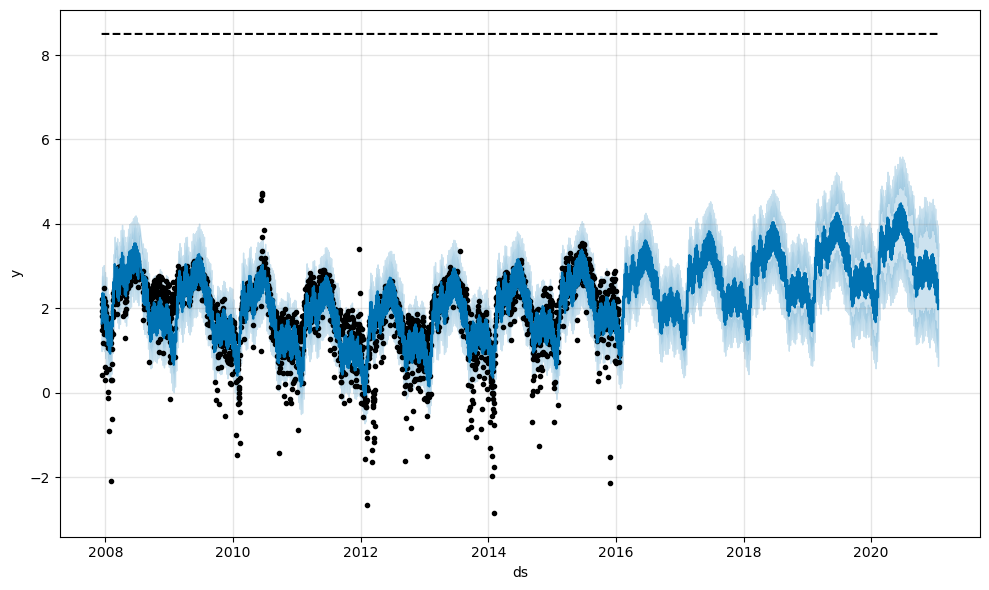

In [34]:
m = Prophet(changepoints=['2012-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)